In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# DQN

In [3]:
from src.OED import OED, OEDGymConfig
from src.DQN import DQN_OED

from pde.AdvectionEquation import *
from pde.Burgers2D import *
from pde.AdvectionDiffusionReaction import *

2025-03-08 13:33:07,090 INFO CLAW: Solver suite is scipy


In [4]:
gym_config = OEDGymConfig()

## Advection Equation

In [8]:
seed = 0
adv_config = Adv2dModelConfig()
adv_eq = Advection2D(adv_config)

In [72]:
adv_dqn = DQN_OED(seed, pde_system=adv_eq, gym_config=gym_config, verbose=0)

In [73]:
model_name = "adv_dqn_1"
adv_dqn.train(model_name, total_timesteps=1000, log_interval=10)

## Burgers Equation

In [14]:
seed = 0
ib_config = Burgers2DConfig()
ib_eq = Burgers2D(ib_config)

In [74]:
ib_dqn = DQN_OED(seed, pde_system=ib_eq, gym_config=gym_config, verbose=0)

In [75]:
model_name = "ib_dqn_1"
ib_dqn.train(model_name, total_timesteps=1000, log_interval=10)

## Advection Diffusion Reaction Equation

In [95]:
seed = 0
adr_config = ADRConfig()
adr_eq = ADR(adr_config)

In [105]:
adr_dqn = DQN_OED(seed, pde_system=adr_eq, gym_config=gym_config, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [106]:
model_name = "adr_dqn_1"
adr_dqn.train(model_name, total_timesteps=1000, log_interval=10)

Logging to ./tensorboard/DQN_9
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | -inf     |
|    exploration_rate | 0.288    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 2963     |
|    time_elapsed     | 0        |
|    total_timesteps  | 75       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.8      |
|    ep_rew_mean      | -inf     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 531      |
|    time_elapsed     | 0        |
|    total_timesteps  | 136      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | inf      |
|    n_updates        | 8        |
----------------------------------
----------------------------------
| rollout/            | 

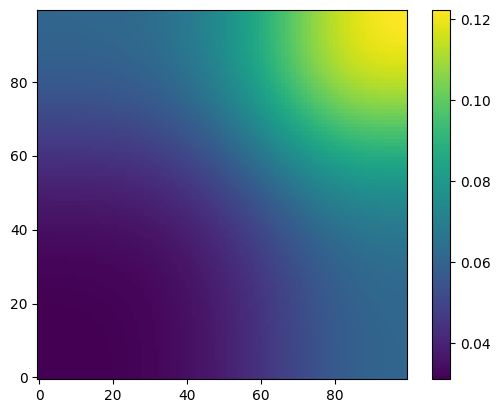

In [107]:
plt.imshow(adr_dqn.env.pde_field[:, :, 20], origin='lower')
plt.colorbar()

In [33]:
pde_field = adr_dqn.env.pde_field

In [35]:
pde_field[:, :, 0]

(100, 100)